In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as st
import scipy.stats as stats
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import het_breuschpagan

In [42]:
df = pd.read_csv('./datasets/housing/housing.csv')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [44]:
df = df.dropna(subset=['total_bedrooms'])

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [46]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [47]:
df.drop(columns=['ocean_proximity'], axis=1, inplace=True)

In [48]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [49]:
df_ajustado = df[df['median_house_value'] < 500000]

In [50]:
df_ajustado.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,19448.000000,19448.000000,19448.000000,19448.000000,19448.000000,19448.000000,19448.000000,19448.000000,19448.000000
mean,-119.563485,35.653467,28.364716,2621.072090,539.645825,1440.852016,501.099907,3.676430,192017.667421
std,2.005890,2.150518,12.510260,2185.975435,422.553057,1144.831193,383.334391,1.569596,97095.550517
min,-124.350000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.760000,33.930000,18.000000,1441.000000,297.000000,797.000000,282.000000,2.526275,116400.000000
50%,-118.500000,34.270000,28.000000,2111.000000,436.000000,1179.000000,411.000000,3.450750,173700.000000
75%,-117.990000,37.730000,37.000000,3119.000000,648.000000,1744.250000,606.000000,4.583300,247800.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,499100.000000


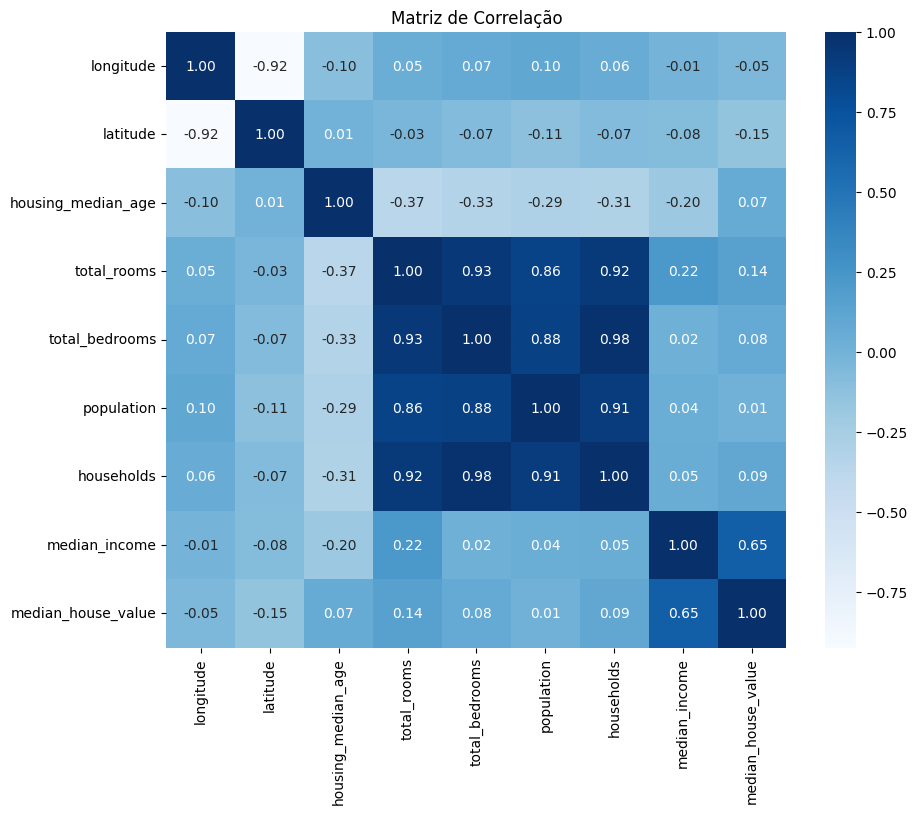

In [51]:
# Matriz de correlação
correlation_matrix = df_ajustado.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f')
plt.title('Matriz de Correlação')
plt.savefig('./figures/matriz_de_correlacao_california.jpg', format='jpg', dpi=300)
plt.show()


## <font color=orangered>variável com maior correlação median_income (65%) </font>

In [52]:
# Modelo de Regressão
x_median_income = df_ajustado['median_income']
x_median_income = st.add_constant(x_median_income)
y_median_house_value = df_ajustado['median_house_value']
regressao_california = st.OLS(y_median_house_value, x_median_income).fit()

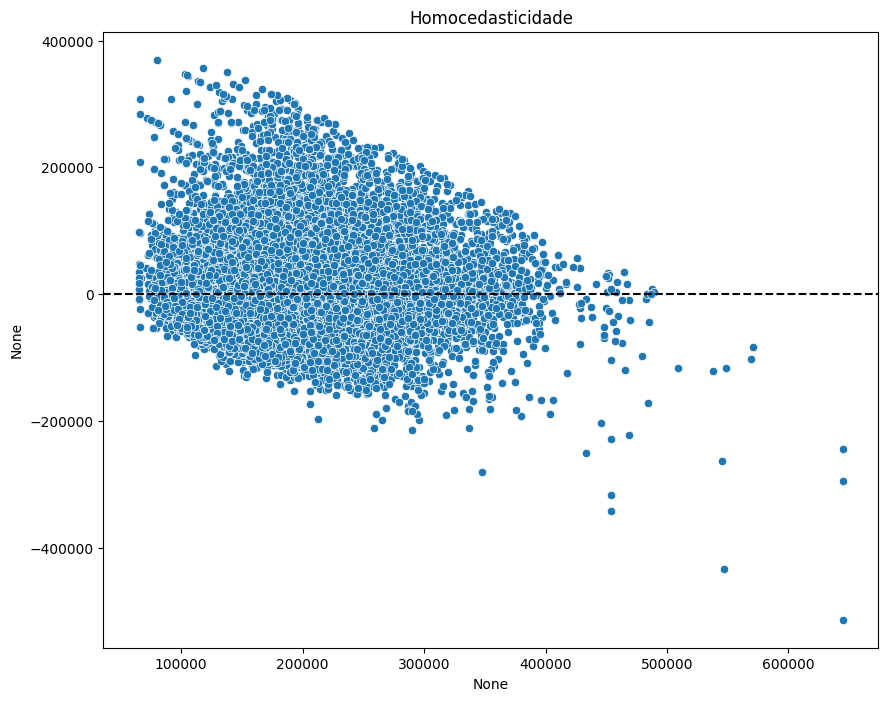

In [53]:
# Análise de premissas
# Teste de homocedasticidade
resid_california = regressao_california.resid

plt.figure(figsize=(10,8))
sns.scatterplot(x=regressao_california.fittedvalues, y=resid_california)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Homocedasticidade')

plt.savefig('./figures/homocedasticidade_california.jpg', format='jpg', dpi=300)

In [54]:
# Teste Breusch-Pagan
est_california, p_california, f_california, fp_california = het_breuschpagan(regressao_california.resid, regressao_california.model.exog)
print(f'Estatística de Teste: {est_california:.2f}')
print(f'p-valor: {p_california}')
print(f'f-valor: {fp_california}')
print(f'f-p-valor: {f_california}')

Estatística de Teste: 86.89
p-valor: 1.148999551321169e-20
f-valor: 1.0472011825991066e-20
f-p-valor: 87.26798636248941


## <font color=orangered>p-valor < 0.05 indica presença de heterocedasticidade no resíduo do modelo</font>

In [55]:
# Teste de Normalidade
est_shapiro_california, p_shapiro_california = stats.shapiro(regressao_california.resid)
print(f'Estatística de teste: {est_california}')
print(f'p-valor: {p_shapiro_california}')

Estatística de teste: 86.88703805029554
p-valor: 2.413276822810396e-65


/Users/rafaelorlandi/Library/Python/3.9/lib/python/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 19448.
  res = hypotest_fun_out(*samples, **kwds)


## <font color=orangered>p-valor < 0.05 indica que os resíduos não são normalmente distribuídos>

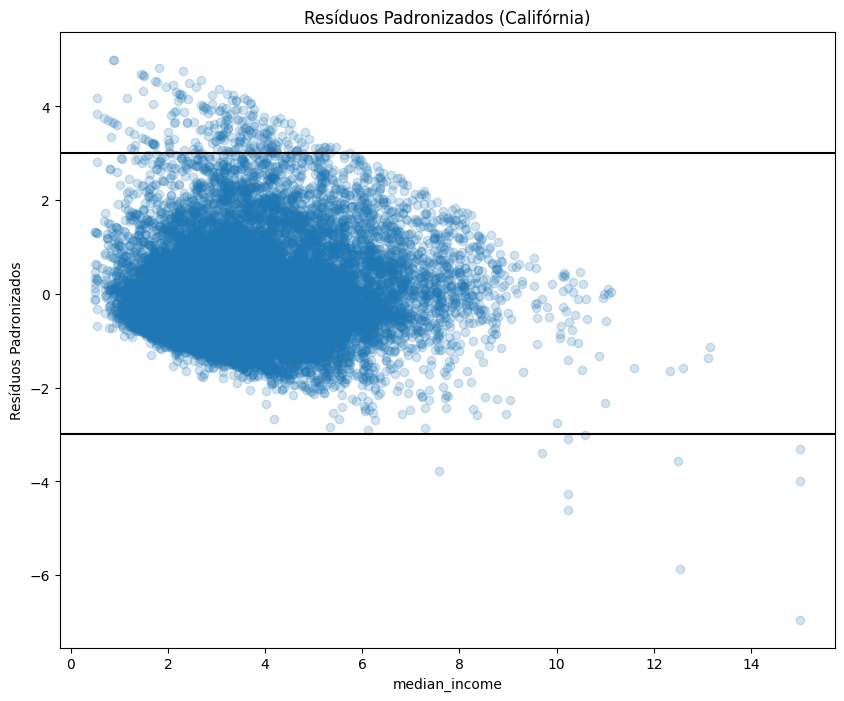

In [56]:
# Teste de outliers
resid_california_padronizados = regressao_california.get_influence().resid_studentized_internal

plt.figure(figsize=(10,8))
plt.scatter(df_ajustado['median_income'], resid_california_padronizados, alpha=0.2)
plt.axhline(y=3, color='black', linestyle='-')
plt.axhline(y=-3, color='black', linestyle='-')
plt.title(f'Resíduos Padronizados (Califórnia)')
plt.xlabel('median_income')
plt.ylabel('Resíduos Padronizados')
plt.savefig('./figures/residuos_padronizados_california.jpg', format='jpg', dpi=300)
plt.show()


In [57]:
print(regressao_california.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                 1.399e+04
Date:                Thu, 01 Aug 2024   Prob (F-statistic):               0.00
Time:                        15:38:47   Log-Likelihood:            -2.4565e+05
No. Observations:               19448   AIC:                         4.913e+05
Df Residuals:                   19446   BIC:                         4.913e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           4.49e+04   1352.286     33.203

## <font color=orangered> R^2 = 0.418, indica que nosso modelo explica 41,8% do median_house_value </font>

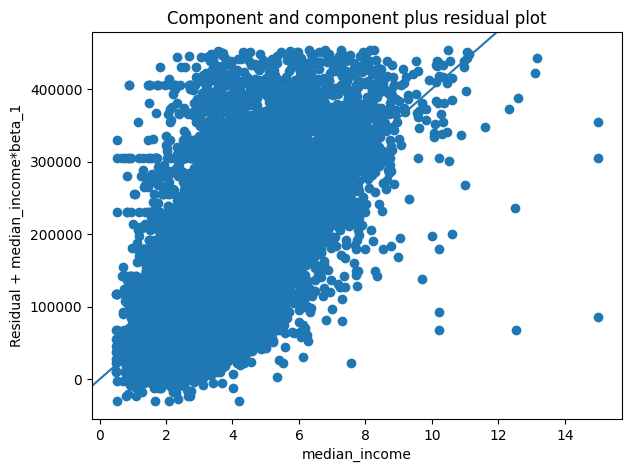

In [58]:
fig_california = st.graphics.plot_ccpr(regressao_california, "median_income")
fig_california.tight_layout(pad=1.0)

plt.savefig('./figures/regressao_california.jpg', format='jpg', dpi=300)

In [59]:
dfbh = pd.read_csv('./datasets/housing/housingBH.csv', sep=';')
dfbh["latitude"] = dfbh["latitude"].str.replace(",", ".").astype(float)
dfbh["longitude"] = dfbh["longitude"].str.replace(",", ".").astype(float)

In [60]:
dfbh.describe()

,banheiros,quartos,andar,area,suites,aluguel,custo,condo_iptu,vagas,nao_mobiliado,...,academia,hipercentro,zona_sul,zona_norte,zona_leste,zona_oeste,apartamento,casa,latitude,longitude
count,1938.000000,1938.000000,1938.000000,1938.000000,1938.000000,1938.000000,1938.000000,1938.000000,1938.000000,1938.000000,...,1938.000000,1938.000000,1938.000000,1938.000000,1938.000000,1938.000000,1938.000000,1938.000000,1938.000000,1938.000000
mean,1.991744,2.600619,3.885965,125.945304,0.846233,2773.501548,3613.773994,800.110939,1.480908,0.786894,...,0.106811,0.171827,0.319401,0.229618,0.134675,0.144479,0.726522,0.273478,-19.919432,-43.949802
std,1.217212,1.265662,4.295235,139.191986,0.857467,2748.815845,5000.392915,3851.844964,1.473180,0.409608,...,0.308953,0.377327,0.466365,0.420696,0.341464,0.351665,0.445859,0.445859,0.032377,0.024431
min,1.000000,1.000000,-2.000000,12.000000,0.000000,500.000000,507.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-19.987066,-44.060069
25%,1.000000,2.000000,1.000000,52.000000,0.000000,1200.000000,1549.000000,231.250000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-19.942297,-43.963015
50%,2.000000,3.000000,2.000000,85.000000,1.000000,1750.000000,2332.000000,500.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-19.926119,-43.946057
75%,2.000000,3.000000,5.000000,148.000000,1.000000,3000.000000,4010.000000,848.500000,2.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-19.897041,-43.934095
max,10.000000,10.000000,32.000000,2000.000000,8.000000,15000.000000,167612.000000,165240.000000,10.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-19.839811,-43.892856


In [61]:
dfbh.columns

Index(['banheiros', 'quartos', 'andar', 'area', 'suites', 'aluguel', 'custo',
       'condo_iptu', 'vagas', 'nao_mobiliado', 'animal', 'arm_coz', 'arm_quar',
       'box', 'arm_ban', 'sol_man', 'silencio', 'novo', 'luz', 'sol_tar',
       'vista_livre', 'chuveiro_ele', 'tomada_nova', 'gas_enc', 'porteiro',
       'elevador', 'salao_fest', 'piscina', 'churrasqueira', 'metro',
       'esp_gourmet', 'quadra', 'academia', 'hipercentro', 'zona_sul',
       'zona_norte', 'zona_leste', 'zona_oeste', 'apartamento', 'casa',
       'latitude', 'longitude'],
      dtype='object')

In [62]:
drop_columns = [
    'custo', 'condo_iptu',
    'nao_mobiliado', 'animal', 'arm_coz', 'arm_quar',
    'box', 'arm_ban', 'sol_man', 'silencio', 'novo', 'luz', 'sol_tar',
    'vista_livre', 'chuveiro_ele', 'tomada_nova', 'gas_enc', 'porteiro',
    'elevador', 'salao_fest', 'piscina', 'churrasqueira', 'metro',
    'esp_gourmet', 'quadra', 'academia', 'hipercentro', 'zona_sul',
    'zona_norte', 'zona_leste', 'zona_oeste', 'apartamento', 'casa'
]

dfbh.drop(columns=drop_columns, axis=1, inplace=True)

In [63]:
dfbh.describe()

,banheiros,quartos,andar,area,suites,aluguel,vagas,latitude,longitude
count,1938.000000,1938.000000,1938.000000,1938.000000,1938.000000,1938.000000,1938.000000,1938.000000,1938.000000
mean,1.991744,2.600619,3.885965,125.945304,0.846233,2773.501548,1.480908,-19.919432,-43.949802
std,1.217212,1.265662,4.295235,139.191986,0.857467,2748.815845,1.473180,0.032377,0.024431
min,1.000000,1.000000,-2.000000,12.000000,0.000000,500.000000,0.000000,-19.987066,-44.060069
25%,1.000000,2.000000,1.000000,52.000000,0.000000,1200.000000,1.000000,-19.942297,-43.963015
50%,2.000000,3.000000,2.000000,85.000000,1.000000,1750.000000,1.000000,-19.926119,-43.946057
75%,2.000000,3.000000,5.000000,148.000000,1.000000,3000.000000,2.000000,-19.897041,-43.934095
max,10.000000,10.000000,32.000000,2000.000000,8.000000,15000.000000,10.000000,-19.839811,-43.892856


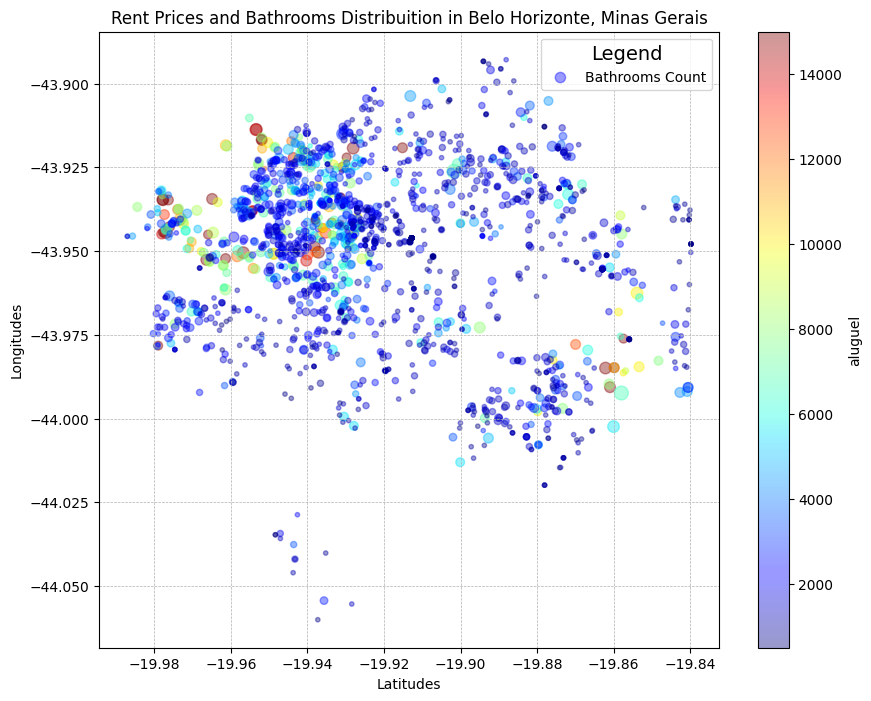

In [64]:
dfbh.plot(kind='scatter', x='latitude', y='longitude', alpha=0.4, s=dfbh['banheiros']*10, label='Bathrooms Count', figsize=(10,8), c='aluguel', cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend(title='Legend', title_fontsize='14', fontsize='10', loc='upper right')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.title('Rent Prices and Bathrooms Distribuition in Belo Horizonte, Minas Gerais')
plt.xlabel('Latitudes')
plt.ylabel('Longitudes')

plt.savefig('./figures/rent_prices_bh.jpg', format='jpg', dpi=300)

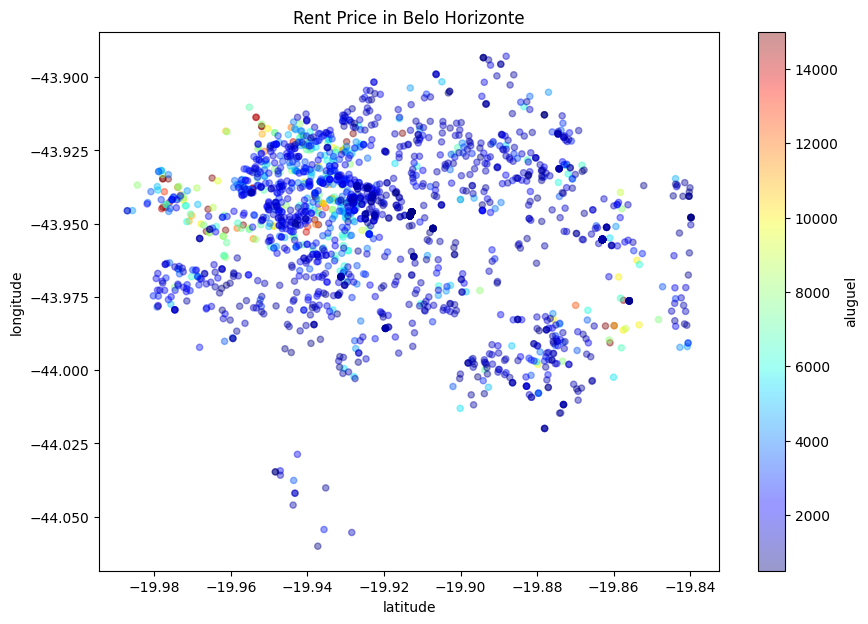

In [65]:
map2 = dfbh.plot(kind = "scatter", x = "latitude", y = "longitude" , alpha = 0.4, c = "aluguel", cmap = plt.get_cmap("jet"), colorbar = True, figsize = (10, 7))
plt.title('Rent Price in Belo Horizonte')

plt.savefig('./figures/rent_prices.jpg', format='jpg', dpi=300)

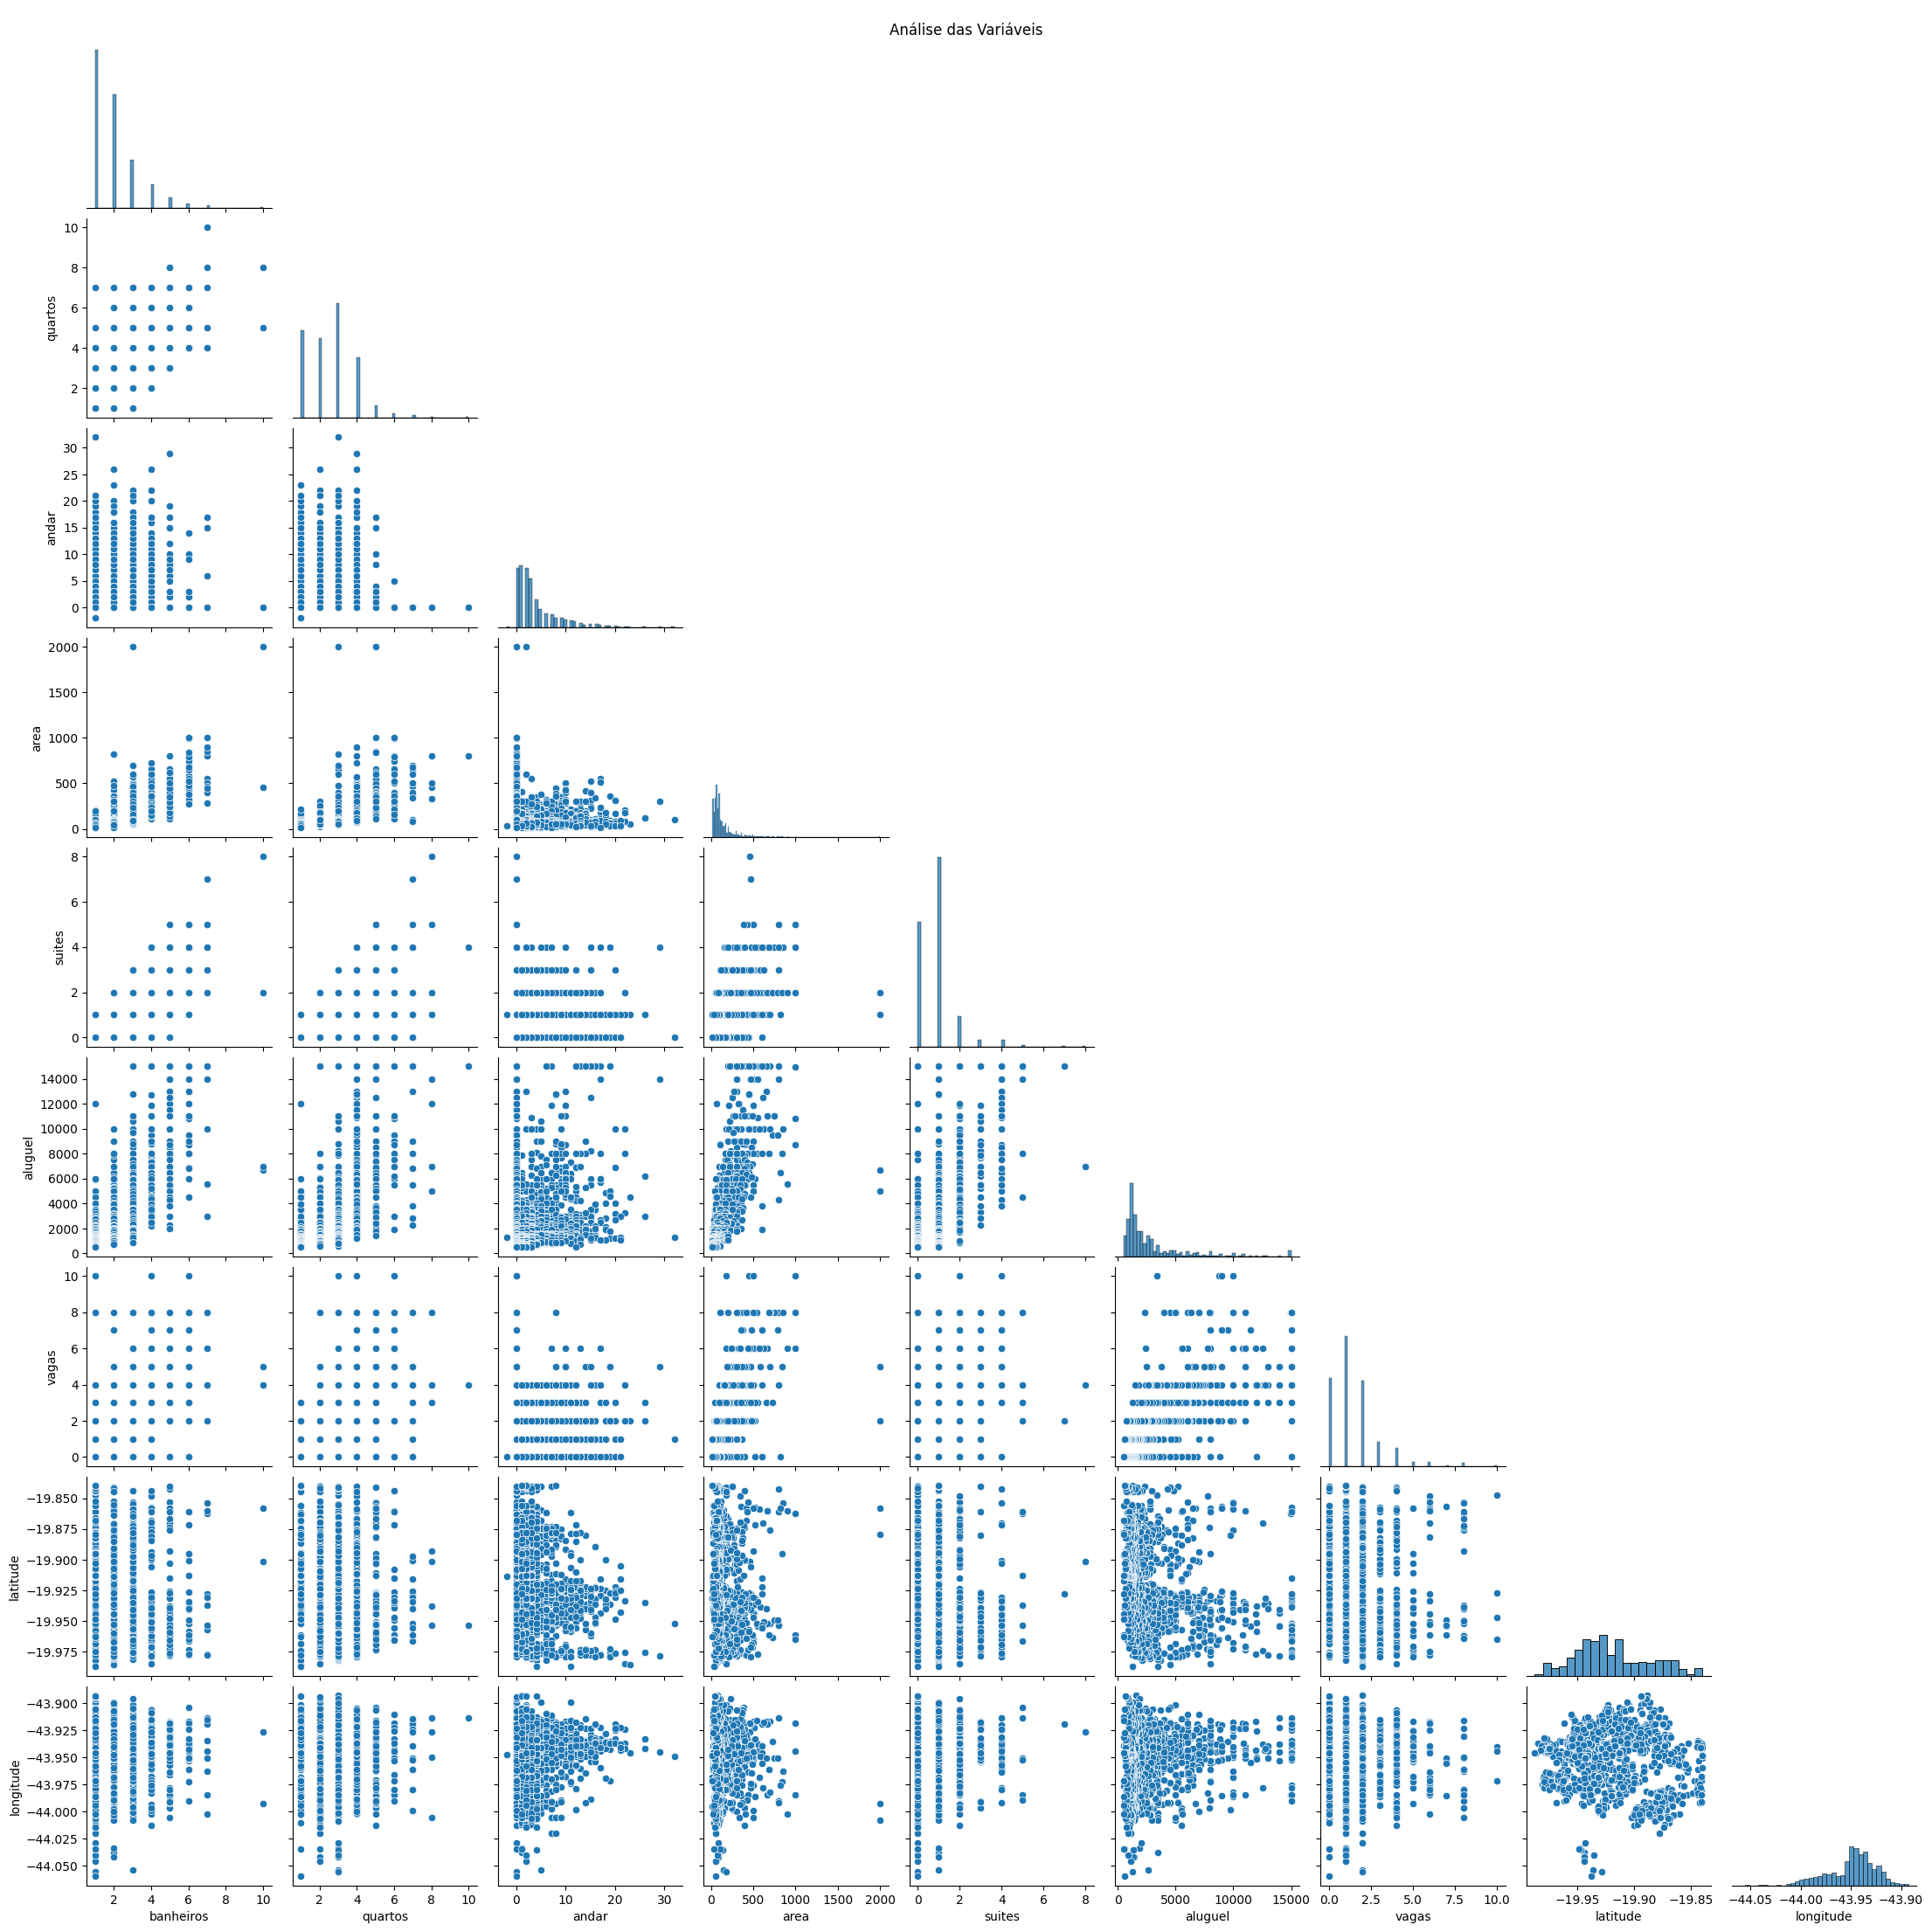

In [66]:
# Análise Gráfica das Variáveis
sns.pairplot(dfbh, corner=True)
plt.suptitle('Análise das Variáveis')
plt.show()

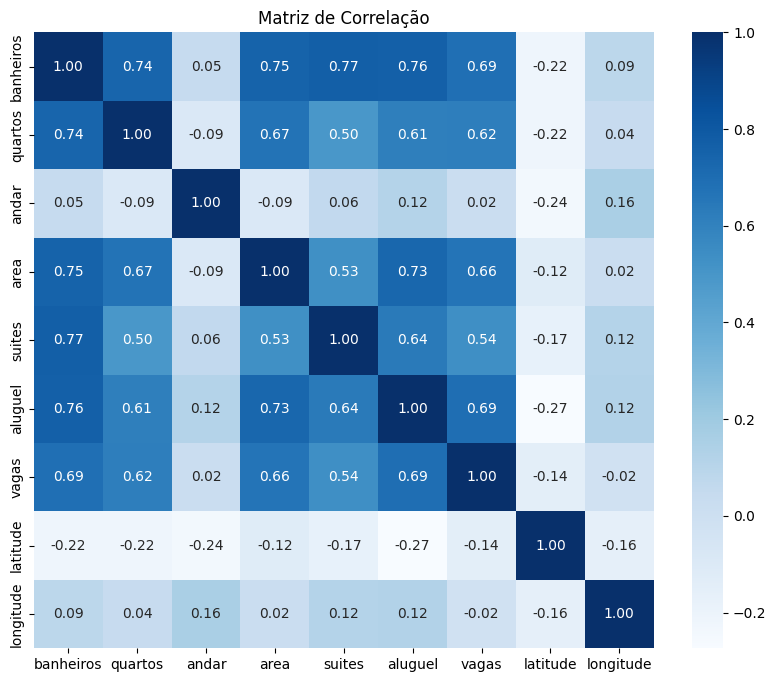

In [67]:
correlation_matrix = dfbh.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f')
plt.title('Matriz de Correlação')
plt.savefig('./figures/matriz_de_correlacao_bh.jpg', format='jpg', dpi=300)
plt.show()


## <font color=orangered>variável com maior correlacao banheiros (76%) </font>

In [68]:
# Modelo de regressão
x_banheiros = dfbh['banheiros']
x_banheiros = st.add_constant(x_banheiros)
y_banheiros = dfbh['aluguel']
regressao_bh = st.OLS(y_banheiros, x_banheiros).fit()

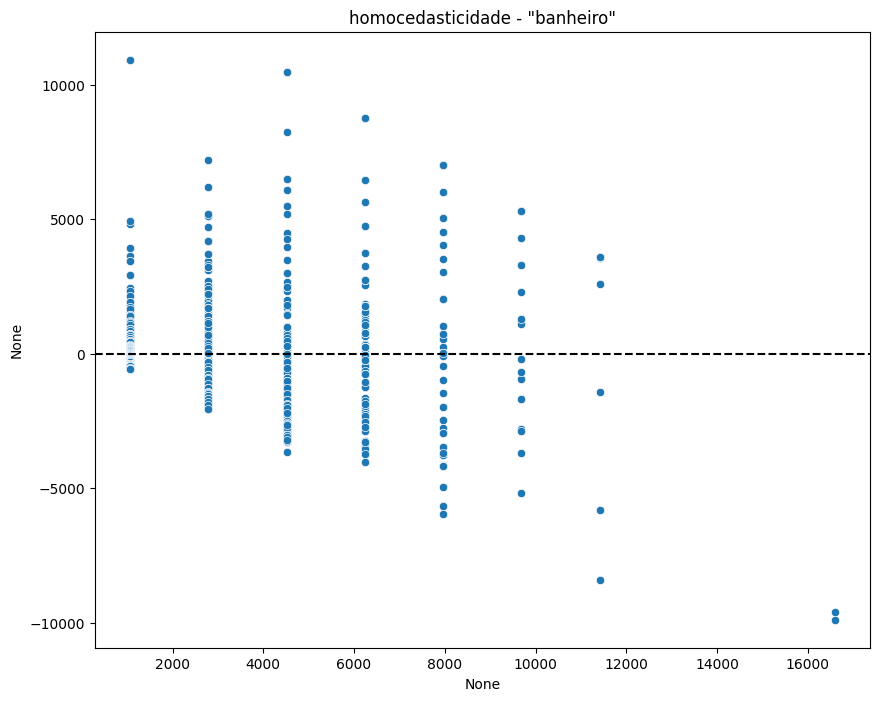

In [69]:
# Análise de premissas
# Teste de homocedasticidade
resid_bh = regressao_bh.resid

plt.figure(figsize=(10,8))
sns.scatterplot(x=regressao_bh.fittedvalues, y=resid_bh)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('homocedasticidade - "banheiro"')

plt.savefig('./figures/homocedasticidade_bh.jpg', format='jpg', dpi=300)

In [70]:
# Teste Breusch-Pagan
est_bh, p_bh, f_bh, fp_bh = het_breuschpagan(regressao_bh.resid, regressao_bh.model.exog)
print(f'Estatística de Teste: {est_bh:.2f}')
print(f'p-valor: {p_bh}')
print(f'f-valor: {fp_bh}')
print(f'f-p-valor: {f_bh}')

Estatística de Teste: 369.12
p-valor: 2.9064741932730293e-82
f-valor: 6.158122177549758e-91
f-p-valor: 455.4975904167354


## <font color=orangered>p-valor < 0.05 indica presença de heterocedasticidade nos resíduos do modelo  </font>

In [71]:
# Teste de normalidade
est_shapiro_bh, p_shapiro_bh = stats.shapiro(regressao_bh.resid)
print(f'Estatística de Teste: {est_shapiro_bh}')
print(f'p-valor: {p_shapiro_bh}')

Estatística de Teste: 0.8532634898144389
p-valor: 3.8225769746683055e-39


## <font color=orangered>p-valor < 0.05 indica que os resíduos não são normalmente distribuídos </font>

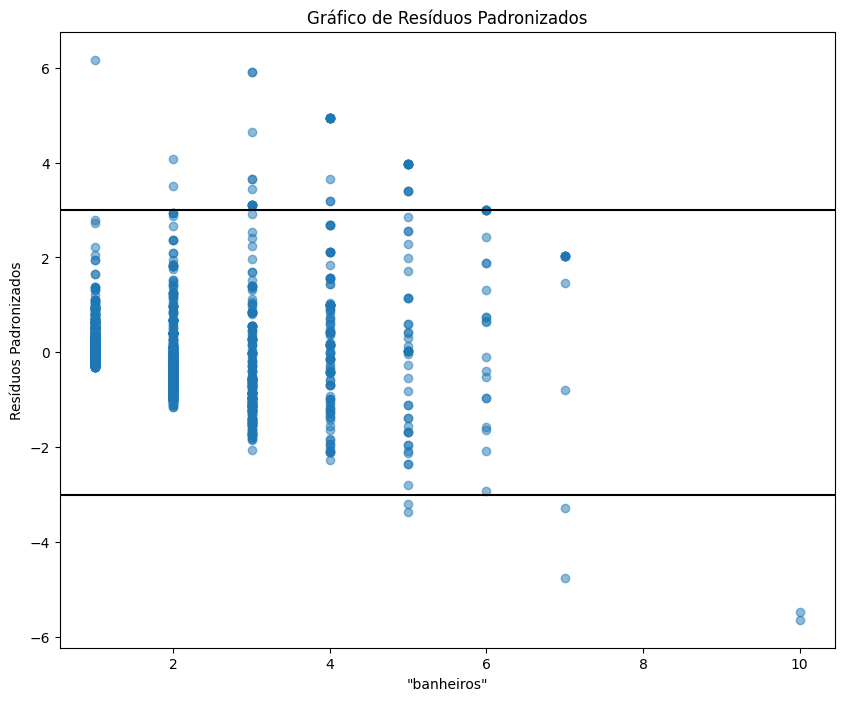

In [72]:
# Teste de outliers
resid_bh_padronizados = regressao_bh.get_influence().resid_studentized_internal

plt.figure(figsize=(10,8))
plt.scatter(dfbh['banheiros'], resid_bh_padronizados, alpha=0.5)
plt.axhline(y=3, color='black', linestyle='-')
plt.axhline(y=-3, color='black', linestyle='-')
plt.title(f'Gráfico de Resíduos Padronizados')
plt.xlabel('"banheiros"')
plt.ylabel('Resíduos Padronizados')
plt.savefig('./figures/residuos_padronizados_bh.jpg', format='jpg', dpi=300)
plt.show()


In [73]:
print(regressao_bh.summary())

                            OLS Regression Results                            
Dep. Variable:                aluguel   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     2715.
Date:                Thu, 01 Aug 2024   Prob (F-statistic):               0.00
Time:                        15:38:52   Log-Likelihood:                -17247.
No. Observations:                1938   AIC:                         3.450e+04
Df Residuals:                    1936   BIC:                         3.451e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -663.0252     77.291     -8.578      0.0

## <font color=orangered> R^2 = 0.584, indica que nosso modelo explica 58,4% do aluguel </font>

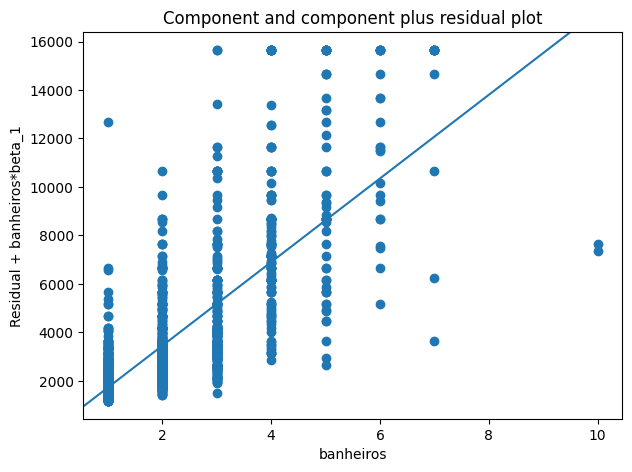

In [74]:
fig_bh = st.graphics.plot_ccpr(regressao_bh, "banheiros")
fig_bh.tight_layout(pad=1.0)

plt.savefig('./figures/regressao_bh.jpg', format='jpg', dpi=300)